In [ ]:
# classified text as ham or spam

# understand the data

In [5]:
message=[line for line in open('smsspamcollection/SMSSpamCollection')]

In [9]:
message[2]

"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"

In [22]:
#using rstip to remove the space (\n) to join the text
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [11]:
messages[2]

"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [23]:
for message_n, messages in enumerate(messages[:3]):
    print (message_n, messages)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


# 1

In [1]:
import pandas as pd

In [3]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',
                    sep='\t',names=["label", "message"] )

In [140]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [77]:
messages.groupby('label').describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [131]:
messages['len']=messages['message'].apply(len)

In [76]:
messages.groupby('label').describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

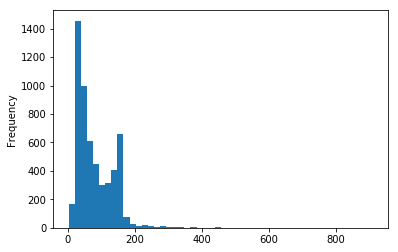

In [67]:
messages['len'].plot(kind='hist',bins=50)

In [4]:
import seaborn as sns

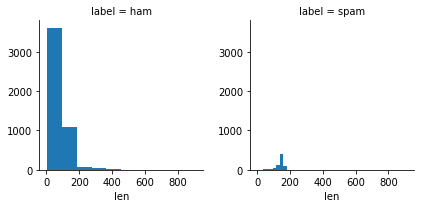

In [74]:
g=sns.FacetGrid(messages,col='label')
g.map(plt.hist,'len')

In [159]:
messages.head(5)

,label,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# transform the data but keep punc and stopwords

In [29]:
X=messages['message']
y=messages['label']

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [31]:
#convert X into list of vectors
X=cv.fit_transform(X)

In [32]:
print (X)

  (0, 8324)	1
  (0, 1082)	1
  (0, 3615)	1
  (0, 7694)	1
  (0, 2061)	1
  (0, 1765)	1
  (0, 4501)	1
  (0, 8548)	1
  (0, 3655)	1
  (0, 1767)	1
  (0, 4114)	1
  (0, 5571)	1
  (0, 1316)	1
  (0, 2338)	1
  (0, 5958)	1
  (0, 4374)	1
  (0, 8084)	1
  (0, 3571)	1
  (1, 5567)	1
  (1, 8450)	1
  (1, 4342)	1
  (1, 4537)	1
  (1, 5538)	1
  (2, 77)	1
  (2, 1169)	1
  :	:
  (5570, 1802)	1
  (5570, 3489)	1
  (5570, 2905)	1
  (5570, 7099)	1
  (5570, 1794)	1
  (5570, 8120)	1
  (5570, 2606)	1
  (5570, 5367)	1
  (5570, 1451)	1
  (5570, 7674)	1
  (5570, 3323)	1
  (5570, 7089)	1
  (5570, 4642)	1
  (5570, 1097)	1
  (5570, 8371)	1
  (5570, 4245)	1
  (5570, 3805)	1
  (5570, 7806)	1
  (5570, 3373)	1
  (5570, 4114)	1
  (5571, 6548)	1
  (5571, 7938)	1
  (5571, 4253)	2
  (5571, 5276)	1
  (5571, 7806)	1


In [33]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB().fit(X, y)
pred_mnb=mnb.predict(X)

In [34]:
total_labels=messages['label'].count()
total_labels

5572

In [35]:
total_labels=messages['label'].count()

for i in range(total_labels):
    if (pred_mnb[i]!=messages['label'][i]):
        count+=1
print ('# of wrong prediction:',count,' out of ',total_labels)
print ('% of wrong prediction:',count/total_labels)
count=0

# of wrong prediction: 36  out of  5572
% of wrong prediction: 0.00646087580761


In [36]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm
print (cm(y, pred_mnb))
print (cr(y, pred_mnb))

[[4812   13]
 [  23  724]]
             precision    recall  f1-score   support

        ham       1.00      1.00      1.00      4825
       spam       0.98      0.97      0.98       747

avg / total       0.99      0.99      0.99      5572



In [ ]:
# such high accuracy, need to find out the purpose of removing punc and stopwords then

# remove all punctuations and stopwords

In [37]:
import string

In [38]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.corpus import stopwords

In [40]:
stopwords.words('English')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [41]:
def remove_all(ra):
    nopunc=[char for char in ra if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('English')]
    

In [42]:
messages['message'].apply(remove_all).head(5)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [56]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 2

Now, convert the list of words to a vector that sklearn can use

 count the frequency of each word.
1, i dont know
2, i eat.
in the first vector it will be 1 1 1 0 (i dont know eat)
(1 does not have eat so it is 0)
secind vector = 1 0 0 1

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
X=messages['message']
y=messages['label']
messages['message'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [45]:
cv=CountVectorizer(analyzer=remove_all)
X=cv.fit_transform(X)

In [46]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB().fit(X, y)
pred_mnb=mnb.predict(X)

In [49]:
for i in range(total_labels):
    if (pred_mnb[i]!=messages['label'][i]):
        count+=1
print ('# of wrong prediction:',count,' out of ',total_labels)
print ('% of wrong prediction:',count/total_labels)
count=0

# of wrong prediction: 30  out of  5572
% of wrong prediction: 0.00538406317301


In [50]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm
print (cm(y, pred_mnb))
print (cr(y, pred_mnb))

[[4809   16]
 [  14  733]]
             precision    recall  f1-score   support

        ham       1.00      1.00      1.00      4825
       spam       0.98      0.98      0.98       747

avg / total       0.99      0.99      0.99      5572



# 3

# find the weights

In [118]:
# weigh the counts, so that frequent tokens get lower weight

In [119]:
# 10millions documents. in one document contain 100 words, the 
# word ' do' appears 3 times. so the term frequency is 
# 3/100=0.03
# if 'do' appear 1000 times in all these documents,
# the inverse document frequency is log(10million/1000=4)
# thus the tf-idf weight is 0.03*4=0.12

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

In [52]:
tfidf_fit=TfidfTransformer()

In [53]:
tfidf_fit

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [54]:
# X is a list of vectors
tfidf_transform=tfidf_fit.fit_transform(X)

In [55]:
print (tfidf_transform)
# the weight of each word

  (0, 2060)	0.242039602564
  (0, 7555)	0.312538562607
  (0, 8917)	0.247046523768
  (0, 5769)	0.24984711893
  (0, 1110)	0.288286201631
  (0, 5218)	0.268705938625
  (0, 8336)	0.170468692922
  (0, 6937)	0.183469241361
  (0, 11163)	0.230266855924
  (0, 7668)	0.264033840655
  (0, 6217)	0.189155577328
  (0, 5217)	0.298351840882
  (0, 1483)	0.312538562607
  (0, 6906)	0.151584746647
  (0, 4653)	0.312538562607
  (0, 10965)	0.190734285451
  (1, 3064)	0.291199541124
  (1, 7701)	0.376740107081
  (1, 2451)	0.561988811929
  (1, 11072)	0.400615609824
  (1, 10698)	0.206363748132
  (1, 8590)	0.504340590131
  (2, 1941)	0.152658172923
  (2, 6331)	0.34790465459
  (2, 423)	0.0963917091981
  :	:
  (5568, 6882)	0.313674697762
  (5568, 11418)	0.343217072511
  (5568, 6691)	0.477810764018
  (5568, 6354)	0.557572104865
  (5569, 8252)	0.432829970906
  (5569, 3228)	0.520467167164
  (5569, 3721)	0.520467167164
  (5569, 10199)	0.520467167164
  (5570, 7800)	0.172438881848
  (5570, 11006)	0.204345259945
  (5570, 8420)

In [56]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB().fit(tfidf_transform, y)
pred_mnb=mnb.predict(tfidf_transform)

In [57]:
total_labels=messages['label'].count()
for i in range(total_labels):
    if (pred_mnb[i]!=messages['label'][i]):
        count+=1
print ('# of wrong prediction:',count,' out of ',total_labels)
print ('% of wrong prediction:',count/total_labels)
count=0

# of wrong prediction: 115  out of  5572
% of wrong prediction: 0.0206389088299


In [58]:
print (cm(y, pred_mnb))
print (cr(y, pred_mnb))

[[4825    0]
 [ 115  632]]
             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [198]:
# with only convert the text to vectors, gives a high accuracy. then why all the extra steps?